# Assignment: Advanced Regression

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
<br>
The company is looking at prospective properties to buy to enter the market.
<br>
You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
<br>
<br>
The company wants to know:
 - Which variables are significant in predicting the price of a house, and 
 - How well those variables describe the price of a house. 
<br>
Also, determine the optimal value of lambda for ridge and lasso regression.
<br>

### Business Goal 
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

In [927]:
# Import necessary modules for data analysis and data visualization. 
import pandas as pd
import numpy as np

# Some visualization libraries
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
## Some other snippit of codes to get the setting right 
import warnings ## importing warnings library. 
warnings.filterwarnings('ignore') ## Ignore warning

In [928]:
#creating a function for count of missing values and % of missing values for d1 dataframe
def missing_data(d1):
    missing_data1 = pd.DataFrame(round(d1.isnull().sum().sort_values(ascending=False)/len(d1.index)*100,2), columns=['% of missing value'])
    missing_data1['Count of Missing Values'] = d1.isnull().sum()
    return missing_data1


## Data Loading and Understanding

In [929]:
df = pd.read_csv('train.csv')

In [930]:
#checking the head of data
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [931]:
#checking the shape of data
df.shape

(1460, 81)

In [932]:
#as we can see we have 81 columns in this dataset
#setting the display area
pd.set_option('display.max_columns', 81)

In [933]:
#checking the head again
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [934]:
#checking the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [935]:
#checking for duplicated rows
df[df.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [936]:
#checking for unique values
df.nunique().sort_values()

CentralAir          2
Utilities           2
Street              2
Alley               2
BsmtHalfBath        3
LandSlope           3
GarageFinish        3
HalfBath            3
PavedDrive          3
PoolQC              3
FullBath            4
MasVnrType          4
BsmtExposure        4
ExterQual           4
MiscFeature         4
BsmtFullBath        4
Fence               4
KitchenQual         4
BsmtCond            4
Fireplaces          4
LandContour         4
LotShape            4
KitchenAbvGr        4
BsmtQual            4
FireplaceQu         5
Electrical          5
YrSold              5
GarageCars          5
GarageQual          5
GarageCond          5
                 ... 
OverallQual        10
TotRmsAbvGrd       12
MoSold             12
Exterior1st        15
MSSubClass         15
Exterior2nd        16
3SsnPorch          20
MiscVal            21
LowQualFinSF       24
Neighborhood       25
YearRemodAdd       61
ScreenPorch        76
GarageYrBlt        97
LotFrontage       110
YearBuilt 

In [937]:
#checking summary statistics
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We can see some outliers in the data

## Data Cleaning

In [938]:
#checking for missing values
missing_data(df).head(10)

,% of missing value,Count of Missing Values
PoolQC,99.52,1453
MiscFeature,96.30,1406
Alley,93.77,1369
Fence,80.75,1179
FireplaceQu,47.26,690
LotFrontage,17.74,259
GarageCond,5.55,81
GarageType,5.55,81
GarageYrBlt,5.55,81
GarageFinish,5.55,81


As we can see we have columns with more than 45% missing values, so removing them as we will not be able to impute data in them.

In [939]:
#removing cols with more than 45% null values
df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis=1, inplace=True)

In [940]:
#setting the Id column as index
df.set_index('Id',inplace=True )

In [941]:
#checking the missing values again
missing_data(df).head(10)

,% of missing value,Count of Missing Values
LotFrontage,17.74,259
GarageType,5.55,81
GarageYrBlt,5.55,81
GarageCond,5.55,81
GarageQual,5.55,81
GarageFinish,5.55,81
BsmtExposure,2.60,38
BsmtFinType2,2.60,38
BsmtFinType1,2.53,37
BsmtCond,2.53,37


In [942]:
#checking the LotFrontage column
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [943]:
#replacing the missing values with 50th quantile value
df['LotFrontage']= df['LotFrontage'].replace(np.nan,df['LotFrontage'].quantile(0.5))

In [944]:
missing_data(df).head(10)

,% of missing value,Count of Missing Values
GarageType,5.55,81
GarageYrBlt,5.55,81
GarageFinish,5.55,81
GarageCond,5.55,81
GarageQual,5.55,81
BsmtExposure,2.60,38
BsmtFinType2,2.60,38
BsmtFinType1,2.53,37
BsmtCond,2.53,37
BsmtQual,2.53,37


In [945]:
#checking the garage column
df[df['GarageType'].isnull()].head(10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
40,90,RL,65.0,6040,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,0,6,2008,WD,AdjLand,82000
49,190,RM,33.0,4456,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,736,736,GasA,Gd,Y,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,8,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,102,0,0,0,0,6,2009,New,Partial,113000
79,90,RL,72.0,10778,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1768,1768,GasA,TA,N,SBrkr,1768,0,0,1768,0,0,2,0,4,2,TA,8,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,136500
89,50,C (all),105.0,8470,Pave,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,TA,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,156,0,0,0,0,10,2009,ConLD,Abnorml,85000
90,20,RL,60.0,8070,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588,Unf,0,402,990,GasA,Ex,Y,SBrkr,990,0,0,990,1,0,1,0,3,1,TA,5,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,8,2007,WD,Normal,123600
100,20,RL,77.0,9320,Pave,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1959,1959,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,569,Unf,0,381,950,GasA,Fa,Y,SBrkr,1225,0,0,1225,1,0,1,1,3,1,TA,6,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,Y,352,0,0,0,0,0,400,1,2010,WD,Normal,128950
109,50,RM,85.0,8500,Pave,Reg,Lvl,AllPub,Corner,Gtl,IDOTRR,Artery,Norm,1Fam,1.5Fin,5,7,1919,2005,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,793,793,GasW,TA,N,FuseF,997,520,0,1517,0,0,2,0,3,1,Fa,7,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,144,0,0,0,0,8,2007,WD,Normal,115000
126,190,RM,60.0,6780,Pave,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,2fmCon,1.5Fin,6,8,1935,1982,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,Fa,CBlock,TA,TA,Av,GLQ,490,Unf,0,30,520,GasA,Gd,N,SBrkr,520,0,234,754,1,0,1,0,2,1,TA,5,Typ,0,NaN,NaN,NaN,0,0,NaN,NaN,N,53,0,0,0,0,0,0,6,2006,WD,Normal,84500
128,45,RM,55.0,4388,Pave,IR1,Bnk,AllPub,Inside,Gtl,OldTown,Feedr,Norm,1Fam,1.5Unf,5,7,1930,1950,Gable,CompShg,WdShing,Wd Sdng,None,0.0,TA,Gd,BrkTil,TA,TA,No,LwQ,116,Unf,0,556,672,GasA,Ex,Y,SBrkr,840,0,0,840,0,0,1,0,3,1,TA,5,Typ,1,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,0,6,2007,WD,Normal,87000


In [946]:
#as we can see all the cols with Garage have missing values where garage is not present, so imputing missing values 
#with None
cols = ['GarageType','GarageFinish','GarageQual','GarageCond']
for col in cols:
    df[col] = df[col].replace(np.nan,'None')

In [947]:
#checking the missing data again
missing_data(df).head(10)

,% of missing value,Count of Missing Values
GarageYrBlt,5.55,81
BsmtFinType2,2.60,38
BsmtExposure,2.60,38
BsmtFinType1,2.53,37
BsmtCond,2.53,37
BsmtQual,2.53,37
MasVnrType,0.55,8
MasVnrArea,0.55,8
Electrical,0.07,1
RoofStyle,0.00,0


In [948]:
df['GarageYrBlt'].head()

Id
1    2003.0
2    1976.0
3    2001.0
4    1998.0
5    2000.0
Name: GarageYrBlt, dtype: float64

In [949]:
#Removing the rows with null values
df = df[~np.isnan(df['GarageYrBlt'])]

In [950]:
#Accroding to data dictonary, null values means no basement , so replacing null values with None
cols = ['BsmtFinType2','BsmtExposure','BsmtQual','BsmtFinType1','BsmtCond']
for col in cols:
    df[col] = df[col].replace(np.nan,'None')

In [951]:
missing_data(df).head()

,% of missing value,Count of Missing Values
MasVnrType,0.58,8
MasVnrArea,0.58,8
Electrical,0.07,1
SalePrice,0.00,0
Foundation,0.00,0


In [952]:
#checking the MasVnrArea 
df['MasVnrArea'].describe()

count    1371.000000
mean      108.997082
std       184.545459
min         0.000000
25%         0.000000
50%         0.000000
75%       171.500000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [953]:
#replacing null values with 0
df['MasVnrArea'] = df['MasVnrArea'].replace(np.nan,0)

In [954]:
#checking the MasVnrType
df['MasVnrType'].value_counts()

None       789
BrkFace    439
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [955]:
#replacing null values in MasVnrType with None
df['MasVnrType'] = df['MasVnrType'].replace(np.nan,'None')

In [956]:
missing_data(df).head()

,% of missing value,Count of Missing Values
Electrical,0.07,1
SalePrice,0.00,0
Foundation,0.00,0
RoofMatl,0.00,0
Exterior1st,0.00,0


In [957]:
#checking the electrical system
df['Electrical'].value_counts()

SBrkr    1272
FuseA      81
FuseF      22
FuseP       2
Mix         1
Name: Electrical, dtype: int64

In [958]:
#replacing null with SBrkr
df['Electrical'] = df['Electrical'].replace(np.nan,'SBrkr')

In [959]:
#checking the missing data
missing_data(df).head()

,% of missing value,Count of Missing Values
SalePrice,0.0,0
YearRemodAdd,0.0,0
RoofMatl,0.0,0
Exterior1st,0.0,0
Exterior2nd,0.0,0


As we can see, our data is free of missing vlaues , so lets start outlier analysis

## Outlier Analysis

In [960]:
#checking summary statistics
df.describe(percentiles=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.92,0.95,0.98,0.99,1])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.000000,1379.00000
mean,56.022480,70.375635,10695.812183,6.187092,5.577955,1972.958666,1985.435098,108.364757,455.578680,48.102248,570.765047,1074.445975,1177.129804,353.424946,4.134880,1534.689630,0.430747,0.058738,1.580131,0.395939,2.865120,1.038434,6.552574,0.641769,1978.506164,1.870921,500.762146,97.456853,47.276287,21.039159,3.609862,15.945613,2.920957,42.889050,6.334300,2007.812183,185479.51124
std,41.026897,21.940932,10214.702133,1.345780,1.081031,29.379883,20.444852,184.195220,459.691379,164.324665,443.677845,436.371874,387.014961,439.553171,40.130546,519.140514,0.514052,0.238285,0.548051,0.502402,0.783961,0.196048,1.589821,0.645985,24.689725,0.630055,185.680520,126.699192,65.210465,60.535107,30.154682,57.249593,41.335545,501.613931,2.696674,1.330221,79023.89060
min,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,1.000000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.00000
10%,20.000000,50.000000,5209.400000,5.000000,5.000000,1926.000000,1950.000000,0.000000,0.000000,0.000000,79.600000,660.000000,768.000000,0.000000,0.000000,936.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1945.000000,1.000000,272.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2006.000000,110000.00000
20%,20.000000,60.000000,7200.000000,5.000000,5.000000,1950.000000,1963.000000,0.000000,0.000000,0.000000,174.600000,768.000000,860.000000,0.000000,0.000000,1092.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1957.000000,1.000000,321.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2006.000000,128000.00000
30%,20.000000,62.000000,8172.000000,5.000000,5.000000,1959.000000,1972.000000,0.000000,0.000000,0.000000,280.400000,848.000000,935.400000,0.000000,0.000000,1224.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,6.000000,0.000000,1965.000000,2.000000,400.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,139540.00000
40%,30.000000,69.000000,8912.600000,6.000000,5.000000,1967.000000,1981.000000,0.000000,247.000000,0.000000,374.200000,918.400000,1021.200000,0.000000,0.000000,1360.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000,6.000000,0.000000,1973.000000,2.000000,442.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2007.000000,151600.00000
50%,50.000000,69.000000,9591.000000,6.000000,5.000000,1976.000000,1994.000000,0.000000,400.000000,0.000000,476.000000,1008.000000,1098.000000,0.000000,0.000000,1479.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,484.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,167500.00000
60%,60.000000,70.000000,10303.200000,6.000000,5.000000,1988.000000,1999.000000,44.000000,545.600000,0.000000,603.600000,1102.400000,1202.400000,474.600000,0.000000,1601.000

As we can see, we have outliers in the following columns:
 - LotArea
 - BsmtFinSF1
 - TotalBsmtSF
 - LowQualFinSF
 - 3SsnPorch
 - MiscVal
 - SalePrice

In [961]:
#Lets remove outliers from them one by one
# removing (statistical) outliers from SalePrice
Q1 = df.SalePrice.quantile(0.05)
Q3 = df.SalePrice.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.SalePrice >= Q1 - 1.5*IQR) & (df.SalePrice <= Q3 + 1.5*IQR)]

In [962]:
#checking the percentiles again
df.describe(percentiles=[0,0.25,0.5,0.75,0.8,0.9,0.92,0.95,0.98,0.99,1])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000,1377.000000
mean,56.016703,70.286129,10684.362382,6.181554,5.578068,1972.926652,1985.420479,107.672476,453.661583,48.172113,570.657952,1072.491649,1175.313725,351.079158,4.140886,1530.533769,0.430646,0.058097,1.578068,0.395062,2.863471,1.038489,6.547567,0.639797,1978.482208,1.869281,500.294844,97.196805,47.251997,21.069717,3.615105,15.968773,2.522150,42.951344,6.337691,2007.813362,184659.583152
std,41.056422,21.804517,10217.075835,1.338878,1.081644,29.389174,20.456092,182.068910,457.097444,164.433803,443.796953,433.659963,384.346416,435.519685,40.159391,507.909600,0.514066,0.237098,0.545767,0.502238,0.783335,0.196185,1.585530,0.644374,24.699617,0.629040,185.409169,126.543188,65.252537,60.573766,30.176275,57.287954,38.593265,501.975676,2.694737,1.330827,76091.657200
min,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,1.000000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
0%,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,1.000000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,20.000000,60.000000,7740.000000,5.000000,5.000000,1955.000000,1968.000000,0.000000,0.000000,0.000000,227.000000,810.000000,894.000000,0.000000,0.000000,1154.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,380.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,134000.000000
50%,50.000000,69.000000,9591.000000,6.000000,5.000000,1976.000000,1994.000000,0.000000,400.000000,0.000000,476.000000,1008.000000,1098.000000,0.000000,0.000000,1479.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,484.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,167500.000000
75%,70.000000,79.000000,11700.000000,7.000000,6.000000,2001.000000,2004.000000,170.000000,731.000000,0.000000,811.000000,1314.000000,1414.000000,734.000000,0.000000,1788.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,578.000000,171.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,217000.000000
80%,80.000000,80.000000,12339.200000,7.000000,6.000000,2003.000000,2005.000000,212.000000,816.000000,0.000000,901.000000,1395.600000,1494.000000,803.200000,0.000000,1893.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,8.000000,1.000000,2004.000000,2.000000,626.000000,192.000000,84.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,234000.000000
90%,120.000000,92.000000,14548.200000,8.000000,7.000000,2006.000000,2007.000000,338.000000,1075.600000,125.800000,1238.200000,1611.600000,1686.0000

In [963]:
# removing (statistical) outliers from LotArea
Q1 = df.LotArea.quantile(0.05)
Q3 = df.LotArea.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.LotArea >= Q1 - 1.5*IQR) & (df.LotArea <= Q3 + 1.5*IQR)]

In [964]:
#checking the percentiles again
df.describe(percentiles=[0,0.25,0.5,0.75,0.8,0.9,0.92,0.95,0.98,0.99,1])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000,1362.000000
mean,56.097651,70.044053,9900.858297,6.172540,5.576358,1972.934655,1985.361233,106.279736,443.806902,46.834802,572.657856,1063.299559,1167.256975,349.342878,4.186490,1520.786344,0.422907,0.058003,1.574890,0.395007,2.863436,1.038913,6.533774,0.627753,1978.538179,1.864905,498.539648,94.922173,46.678414,21.265051,3.654919,15.861968,2.197504,42.543319,6.333333,2007.812775,183558.036711
std,41.039344,20.719983,4246.645333,1.331375,1.082409,29.425121,20.474537,179.783232,429.150983,161.379213,444.538555,406.790784,367.556253,433.482419,40.377723,486.654961,0.507407,0.236956,0.541355,0.502372,0.778381,0.197221,1.568178,0.634700,24.688575,0.629394,183.619356,122.592435,64.230156,60.863788,30.339710,57.178569,36.581031,504.250184,2.692776,1.332149,75059.831896
min,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,1.000000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
0%,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,1.000000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,20.000000,60.000000,7688.750000,5.000000,5.000000,1955.000000,1968.000000,0.000000,0.000000,0.000000,230.000000,807.250000,894.000000,0.000000,0.000000,1148.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,375.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,133750.000000
50%,50.000000,69.000000,9557.000000,6.000000,5.000000,1976.000000,1994.000000,0.000000,395.500000,0.000000,480.500000,1004.000000,1096.000000,0.000000,0.000000,1475.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,484.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,167000.000000
75%,70.000000,79.000000,11616.000000,7.000000,6.000000,2001.000000,2004.000000,170.000000,719.000000,0.000000,811.000000,1302.000000,1392.000000,729.750000,0.000000,1779.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,577.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
80%,80.000000,80.000000,12204.600000,7.000000,6.000000,2003.000000,2005.000000,210.000000,809.600000,0.000000,905.800000,1391.800000,1484.000000,799.600000,0.000000,1872.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,8.000000,1.000000,2004.000000,2.000000,624.800000,192.000000,84.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,231900.000000
90%,120.000000,92.000000,14189.400000,8.000000,7.000000,2006.000000,2007.000000,336.000000,1058.700000,118.800000,1240.000000,1601.800000,1678.600000

In [965]:
df.shape

(1362, 75)

In [966]:
# removing (statistical) outliers from MiscVal
Q1 = df.MiscVal.quantile(0.05)
Q3 = df.MiscVal.quantile(0.95)
IQR = Q3 - Q1
df = df[(df.MiscVal >= Q1 - 1.5*IQR) & (df.MiscVal <= Q3 + 1.5*IQR)]

In [967]:
#checking the percentiles again
df.describe(percentiles=[0,0.25,0.5,0.75,0.8,0.9,0.92,0.95,0.98,0.99,1])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.000000,1315.0,1315.000000,1315.000000,1315.000000
mean,56.547529,70.006844,9873.547529,6.193916,5.557414,1973.396198,1985.659316,108.122433,444.586312,47.216730,577.250951,1069.053992,1171.202281,350.030418,3.943726,1525.176426,0.423574,0.057034,1.580989,0.397719,2.863118,1.038023,6.539924,0.628897,1978.759696,1.873004,499.852471,94.641065,46.599240,20.694297,3.542205,15.291255,1.881369,0.0,6.324715,2007.800760,184664.488973
std,41.467339,20.971985,4288.659127,1.337195,1.075681,29.462054,20.501798,181.456448,432.042895,163.255944,448.072304,408.175188,370.413969,433.170063,39.675279,485.629107,0.506479,0.235254,0.539268,0.501894,0.773102,0.195261,1.566063,0.632035,24.774356,0.631367,184.160825,121.768940,62.831948,60.256069,29.610516,54.725519,34.387592,0.0,2.702435,1.328129,75606.047361
min,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,1.000000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,2006.000000,35311.000000
0%,20.000000,21.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,1.000000,160.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,2006.000000,35311.000000
25%,20.000000,60.000000,7614.500000,5.000000,5.000000,1955.500000,1968.000000,0.000000,0.000000,0.000000,232.000000,813.000000,894.000000,0.000000,0.000000,1158.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,379.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,5.000000,2007.000000,134216.000000
50%,50.000000,69.000000,9525.000000,6.000000,5.000000,1976.000000,1995.000000,0.000000,390.000000,0.000000,484.000000,1008.000000,1098.000000,0.000000,0.000000,1481.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,484.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.0,6.000000,2008.000000,167900.000000
75%,70.000000,79.000000,11616.000000,7.000000,6.000000,2002.000000,2004.000000,171.000000,728.000000,0.000000,813.500000,1310.500000,1411.500000,729.500000,0.000000,1786.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,583.000000,168.000000,69.000000,0.000000,0.000000,0.000000,0.000000,0.0,8.000000,2009.000000,217000.000000
80%,80.000000,81.000000,12186.200000,7.000000,6.000000,2004.000000,2005.000000,212.600000,814.000000,0.000000,916.400000,1393.200000,1494.000000,804.000000,0.000000,1886.400000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,8.000000,1.000000,2004.000000,2.000000,628.000000,192.000000,84.000000,0.000000,0.000000,0.000000,0.000000,0.0,8.000000,2009.000000,233182.000000
90%,120.000000,92.600000,14196.400000,8.000000,7.000000,2006.000000,2007.000000,336.600000,1065.000000,117.000000,1258.000000,1608.400000,1683.200000,948.800000,0.000000,2156.600000,1.000000,0.0000

As we can see out data is uniform now and we can say that we have removed most of the outliers in the data

In [968]:
#checking the no of rows after outlier analysis
df.shape

(1315, 75)

In [969]:
((1460-1315)/1460)*100

9.931506849315069

We can see that we have lost about only 9.93 percent of data in removing outliers. So we are good till now. Lets start EDA

## EDA

In [970]:
#seperating out numerical and categorical variables
cat_feat = list(df.dtypes[df.dtypes == 'object'].index)
num_feat = list(df.dtypes[df.dtypes != 'object'].index)

In [971]:
print('No of categorical features= {0} and number of numerical features= {1}'.format(len(cat_feat),len(num_feat)))

No of categorical features= 38 and number of numerical features= 37


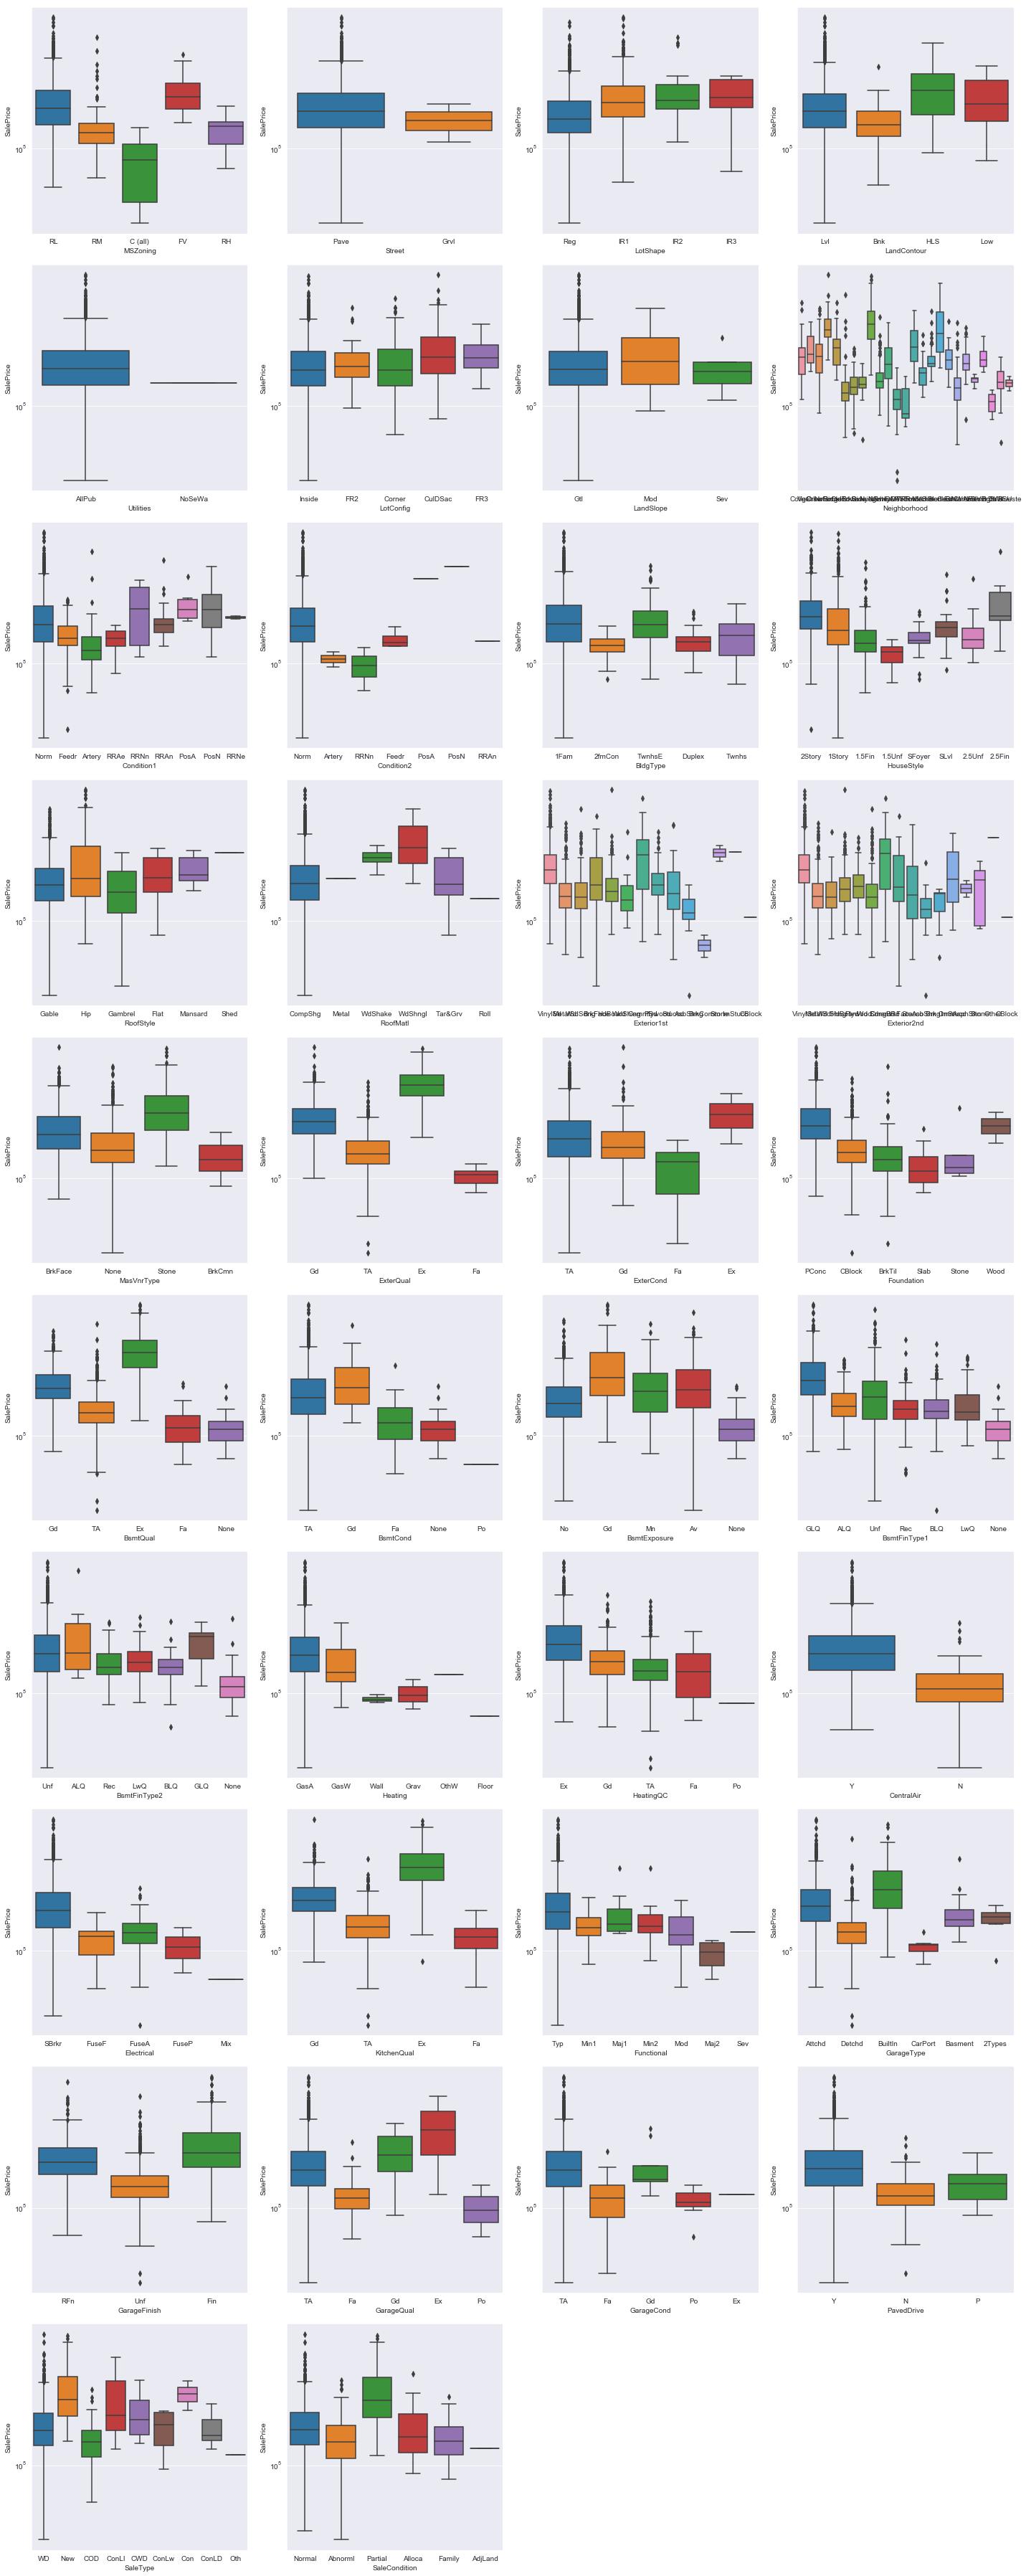

In [972]:
#checking the unique values in categorical feaures
i = 1
plt.figure(figsize=(20,50))
for col in cat_feat:
    plt.subplot(10,4,i)
    sns.boxplot(x=df[col],y=df['SalePrice'])
    i = i + 1
    plt.yscale('log')
plt.tight_layout()
plt.show()

From the above graphs we can see that the following columns containes imbalanced data:
 - Utilities
 - Condition2
 - RoofMatl <br>
So removing these columns from the data.

In [973]:
df.drop(['Utilities','Condition2','RoofMatl'], axis=1,inplace=True)

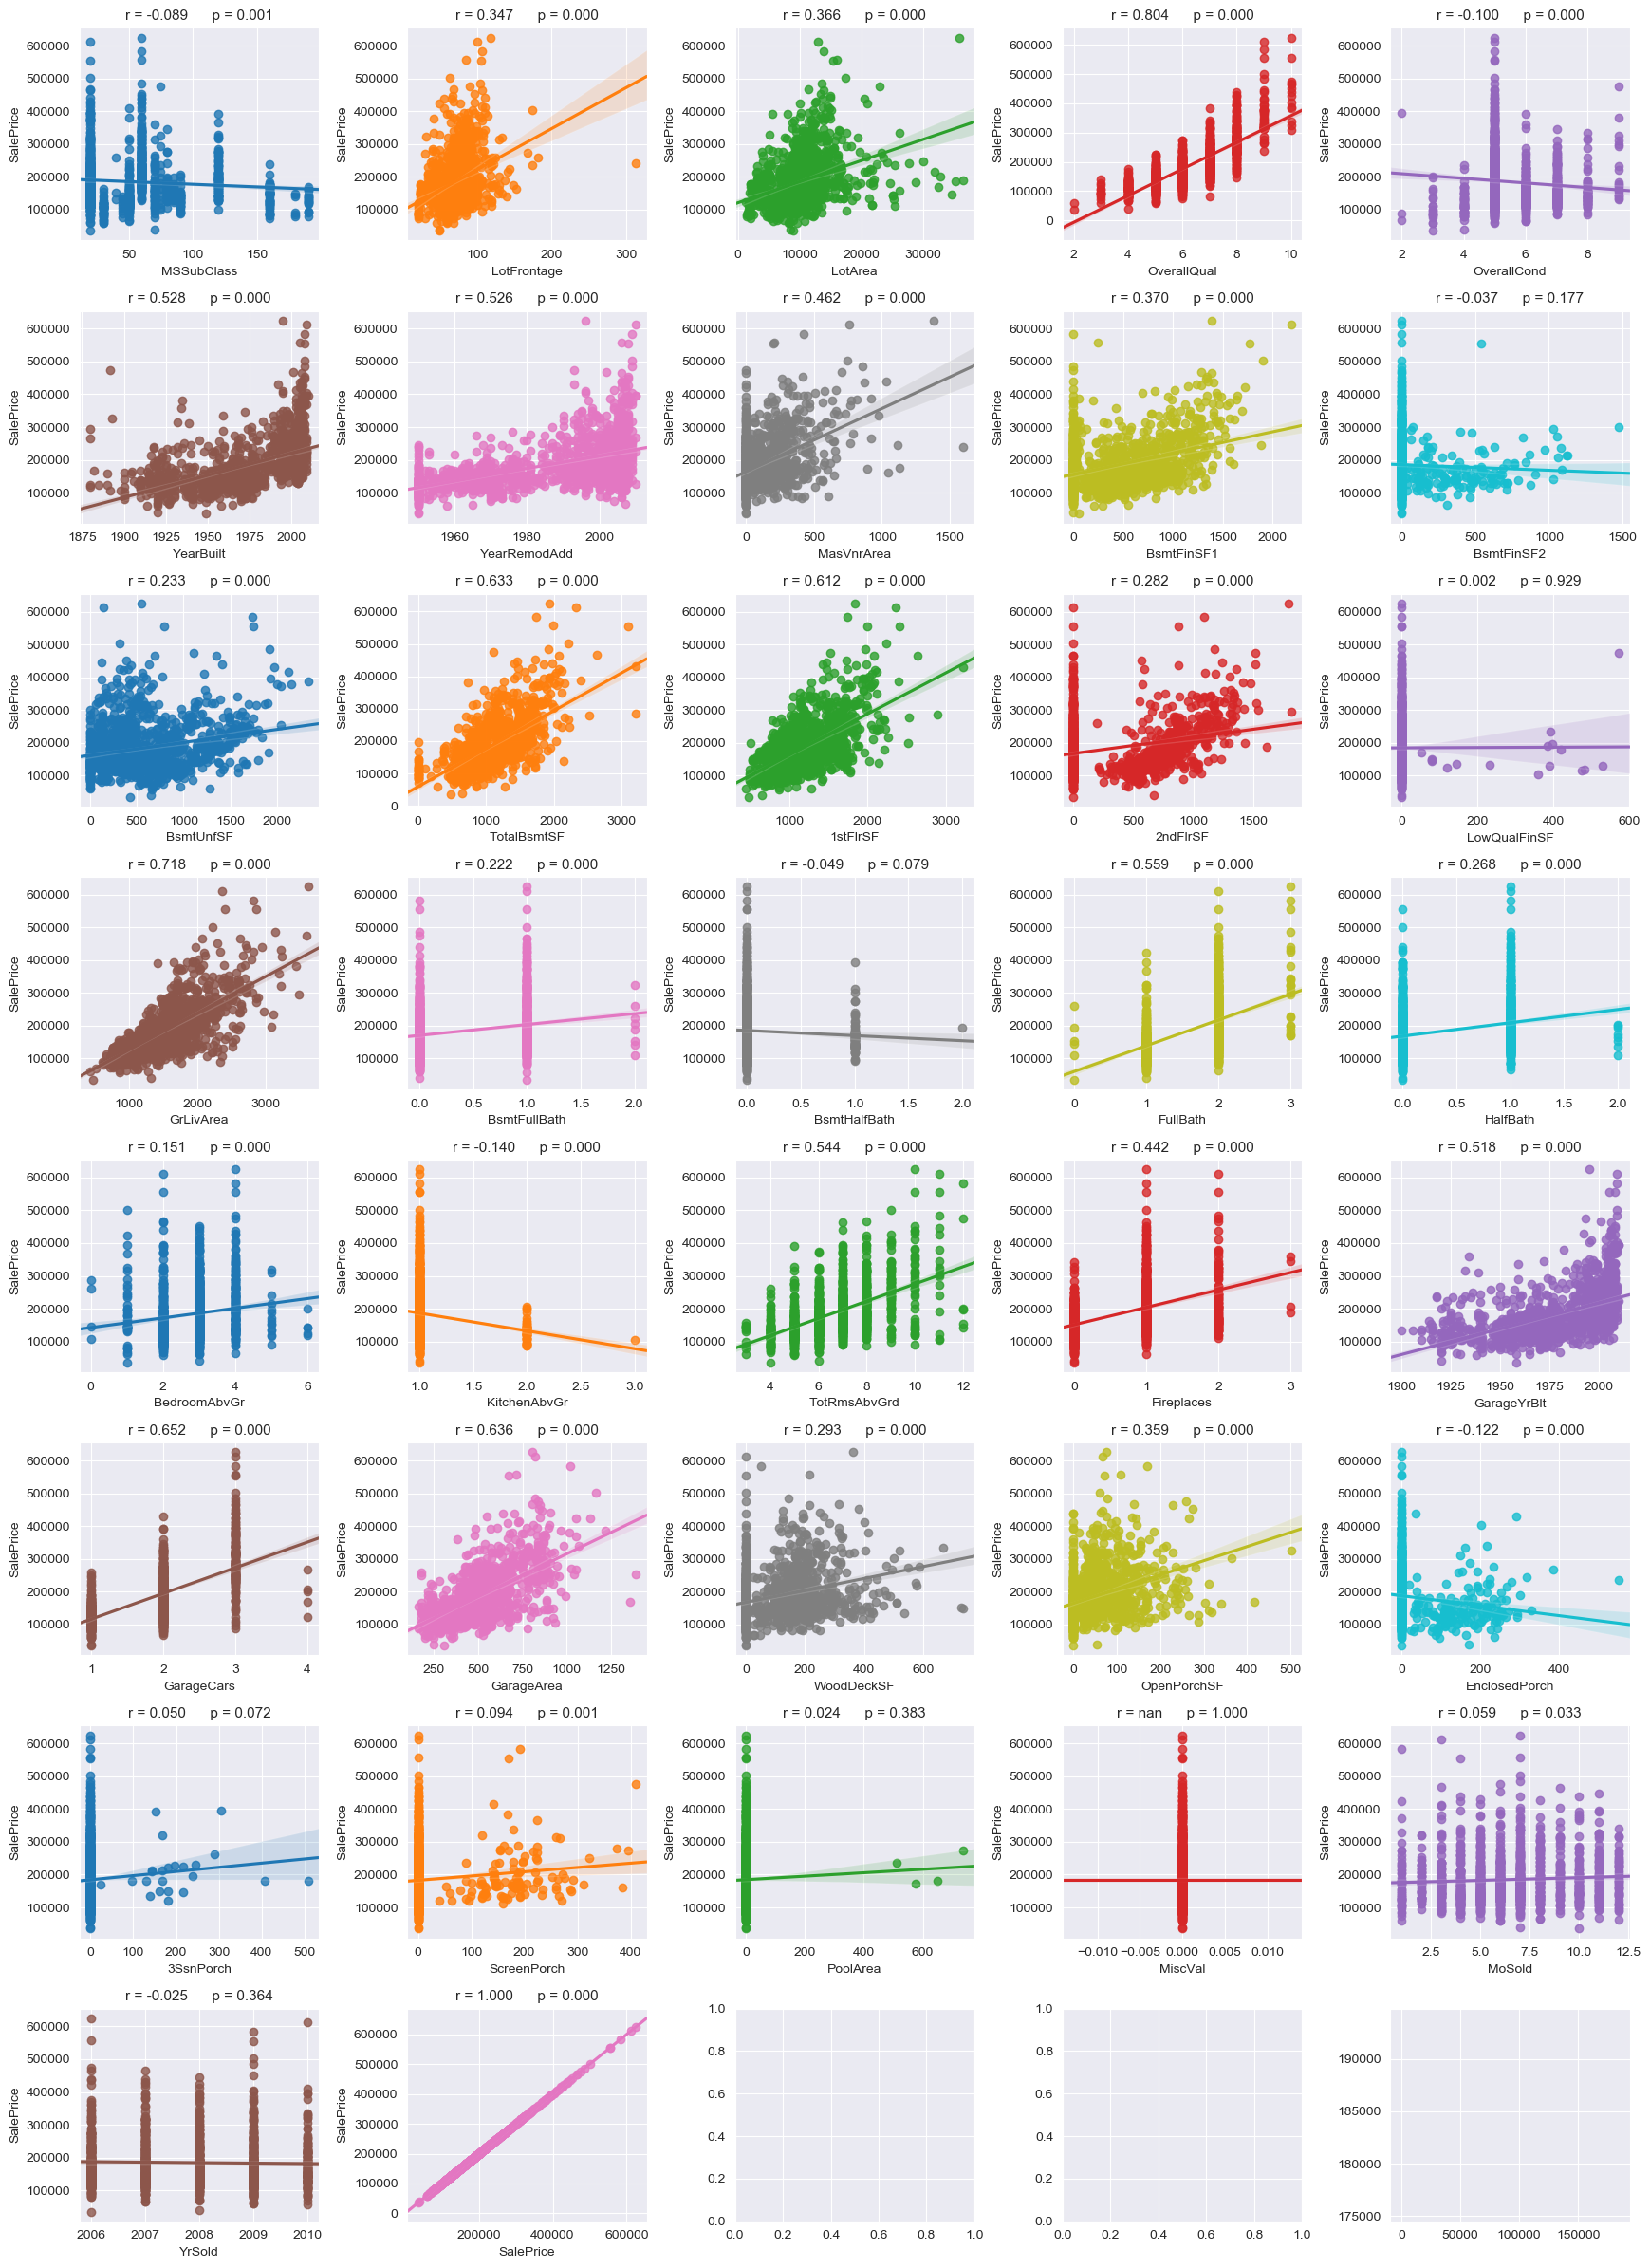

In [974]:
#visualising all the numerical features against price column

nr_rows = 8
nr_cols = 5
from scipy import stats
fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5,nr_rows*3),dpi=100)

for r in range(0,nr_rows):
    for c in range(0,nr_cols):  
        i = r*nr_cols+c
        if i < len(num_feat):
            sns.regplot(df[num_feat[i]], df['SalePrice'], ax = axs[r][c])
            stp = stats.pearsonr(df[num_feat[i]], df['SalePrice'])
            str_title = "r = " + "{0:.3f}".format(stp[0]) + "      " "p = " + "{0:.3f}".format(stp[1])
            axs[r][c].set_title(str_title,fontsize=11)
            
plt.tight_layout()    
plt.show()   

From the above charts we can see for the following variables, we have a very high p values:
 - BsmtFinSF2
 - LowQualFinSF
 - BsmtHalfBath
 - PoolArea <br>
Removing these columns from the data

In [975]:
df.drop(['BsmtFinSF2','LowQualFinSF','BsmtHalfBath','PoolArea'], axis=1, inplace=True)

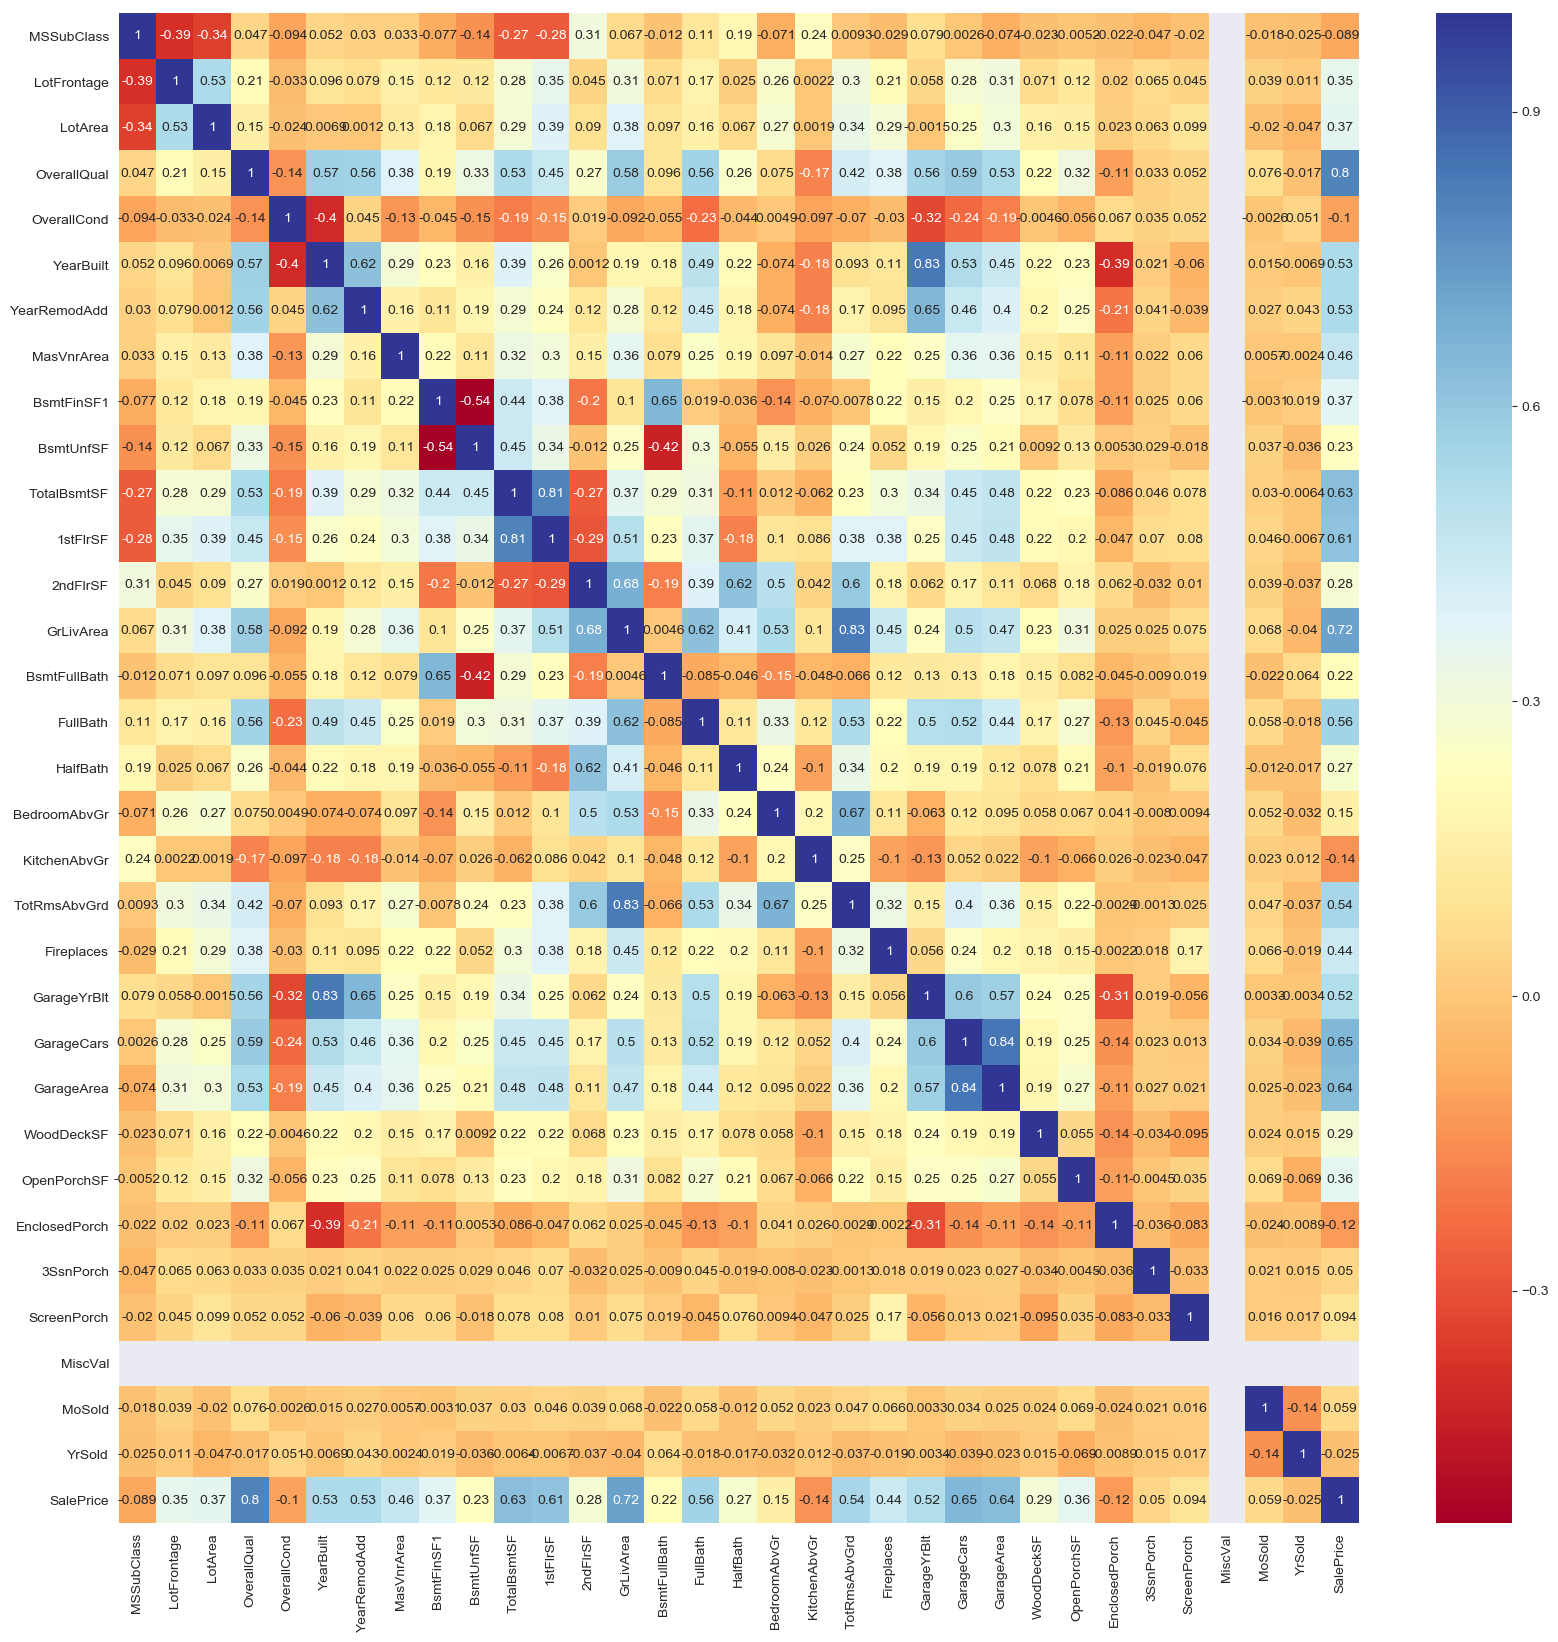

In [976]:
#checking correlation of numerical features
plt.figure(figsize=(20,20), dpi=100)
sns.heatmap(df.corr(), annot=True, cmap='RdYlBu')
plt.show()

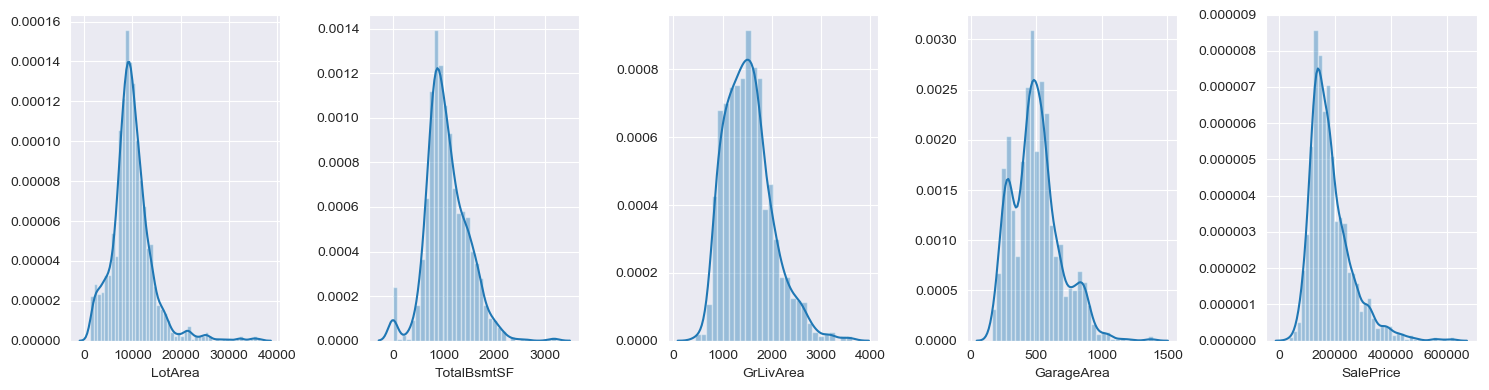

In [977]:
#checking the distribution of area columns and saleprice
cols = ['LotArea','TotalBsmtSF','GrLivArea','GarageArea','SalePrice']
plt.figure(figsize=(15,4),dpi=100)
i=1
for col in cols:
    plt.subplot(1,5,i)
    sns.distplot(df[col])
    i=i+1
plt.tight_layout()
plt.show()

As we can see we have almost normal ditribution for all the area variables. Lets encode the data and start modelling.

## Data Preperation

### Encoding of categorical variables

We will use label Encoding of sklearn library for this assignment.

In [978]:
#importing the necessary libraries
from sklearn.preprocessing import LabelEncoder

In [979]:
#getting categorical variables
cat_feat = list(df.dtypes[df.dtypes == 'object'].index)

In [980]:
#Encoding the categorical variables
for c in cat_feat:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))

In [981]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,3,65.0,8450,1,3,3,4,0,5,2,0,5,7,5,2003,2003,1,11,13,1,196.0,2,3,2,2,4,3,2,706,6,150,856,1,0,1,4,856,854,1710,1,2,1,3,1,2,8,6,0,1,2003.0,1,2,548,4,4,2,0,61,0,0,0,0,2,2008,8,4,208500
2,20,3,80.0,9600,1,3,3,2,0,24,1,0,2,6,8,1976,1976,1,7,8,2,0.0,3,3,1,2,4,1,0,978,6,284,1262,1,0,1,4,1262,0,1262,0,2,0,3,1,3,6,6,1,1,1976.0,1,2,460,4,4,2,298,0,0,0,0,0,5,2007,8,4,181500
3,60,3,68.0,11250,1,0,3,4,0,5,2,0,5,7,5,2001,2002,1,11,13,1,162.0,2,3,2,2,4,2,2,486,6,434,920,1,0,1,4,920,866,1786,1,2,1,3,1,2,6,6,1,1,2001.0,1,2,608,4,4,2,0,42,0,0,0,0,9,2008,8,4,223500
4,70,3,60.0,9550,1,0,3,0,0,6,2,0,5,7,5,1915,1970,1,12,15,2,0.0,3,3,0,4,1,3,0,216,6,540,756,1,2,1,4,961,756,1717,1,1,0,3,1,2,7,6,1,5,1998.0,2,3,642,4,4,2,0,35,272,0,0,0,2,2006,8,0,140000
5,60,3,84.0,14260,1,0,3,2,0,15,2,0,5,8,5,2000,2000,1,11,13,1,350.0,2,3,2,2,4,0,2,655,6,490,1145,1,0,1,4,1145,1053,2198,1,2,1,4,1,2,9,6,1,1,2000.0,1,3,836,4,4,2,192,84,0,0,0,0,12,2008,8,4,250000


### Train-test Split

In [982]:
from sklearn.model_selection import train_test_split

In [983]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)
print(df_train.shape)
print(df_test.shape)

(920, 68)
(395, 68)


### Feature Scaling

In [984]:
#Here we will scale full dataframe using MinMax scaler
cols = df_train.columns

In [985]:
#importing minmax scaler from sklearn.preprocessing and scaling the training dataframe
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train[cols] = scaler.fit_transform(df_train[cols])

In [986]:
#transforming the test data set
df_test[cols] = scaler.transform(df_test[cols])

In [987]:
#checking minmax scaling
df_train.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.000000,920.0,920.000000,920.000000,920.000000,920.000000,920.000000
mean,0.219086,0.756793,0.166111,0.241283,0.997826,0.644203,0.929348,0.769293,0.027174,0.519112,0.255707,0.132609,0.440683,0.520516,0.507764,0.719464,0.582409,0.279130,0.664632,0.690870,0.583696,0.067654,0.843116,0.955797,0.281739,0.669837,0.927717,0.581522,0.521377,0.204562,0.928986,0.244145,0.333108,0.205870,0.373641,0.947826,0.923098,0.261887,0.192027,0.339503,0.210870,0.527899,0.192935,0.475362,0.021196,0.781522,0.390700,0.963225,0.212681,0.460435,0.695401,0.593478,0.285870,0.274751,0.967935,0.975815,0.950543,0.128138,0.094942,0.039635,0.006885,0.039085,0.0,0.476482,0.445380,0.940761,0.760000,0.246768
std,0.242271,0.156541,0.073096,0.123729,0.046600,0.472407,0.227392,0.395114,0.124831,0.254621,0.114127,0.314583,0.272726,0.168918,0.154527,0.230193,0.344175,0.164006,0.242004,0.234769,0.208047,0.116594,0.228331,0.131866,0.142774,0.320713,0.230775,0.287594,0.371128,0.197086,0.203863,0.193863,0.127030,0.057593,0.436062,0.222499,0.258683,0.134619,0.239261,0.153021,0.253574,0.181863,0.247960,0.131707,0.103459,0.270630,0.172995,0.152182,0.208764,0.361354,0.238731,0.408640,0.206398,0.149499,0.148181,0.127329,0.203345,0.164318,0.126901,0.111494,0.059184,0.137402,0.0,0.243707,0.330805,0.190363,0.216732,0.131712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.750000,0.133562,0.176136,1.000000,0.000000,1.000000,0.500000,0.000000,0.291667,0.250000,0.000000,0.285714,0.375000,0.428571,0.581395,0.283333,0.200000,0.519231,0.533333,0.333333,0.000000,0.666667,1.000000,0.200000,0.500000,1.000000,0.500000,0.333333,0.000000,1.000000,0.098352,0.252422,0.200000,0.000000,1.000000,1.000000,0.162724,0.000000,0.227579,0.000000,0.333333,0.000000,0.333333,0.000000,0.666667,0.222222,1.000000,0.000000,0.200000,0.538462,0.000000,0.000000,0.178862,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.272727,0.250000,1.000000,0.800000,0.157585
50%,0.176471,0.750000,0.164384,0.229403,1.000000,1.000000,1.000000,1.000

In [988]:
# divide into X_train, y_train, X_test, y_test
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test

## Modelling

Modelling Approach:
- Multiple linear regression using feature selection by cross validation
- Ridge Regression
- Lasso Regression

### Multiple Linear Regression

In [989]:
#importing important libraries
#cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
#linear regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

#checking the r2 score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

Lets see if our data has some multicollinearity issue using VIF

In [990]:
# creating function for vif 
from statsmodels.stats.outliers_influence import variance_inflation_factor
def vif(X_train):
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [991]:
vif(X_train).head()

,Features,VIF
39,GrLivArea,1316.92
37,1stFlrSF,642.57
4,Street,295.67
38,2ndFlrSF,291.76
32,TotalBsmtSF,132.74


In [992]:
#removing GrLivArea from X_train as it is having very high VIF
X_train.drop('GrLivArea', axis=1, inplace=True)
vif(X_train).head()

,Features,VIF
4,Street,295.66
32,TotalBsmtSF,132.70
15,YearBuilt,86.15
54,GarageCond,84.66
53,GarageQual,67.27


In [993]:
#removing Street from X_train as it is having very high VIF
X_train.drop('Street', axis=1, inplace=True)
vif(X_train).head()

,Features,VIF
31,TotalBsmtSF,130.94
14,YearBuilt,84.96
53,GarageCond,83.97
52,GarageQual,66.54
22,ExterCond,60.02


In [994]:
X_train.shape

(920, 65)

In [995]:
X_test = X_test[X_train.columns]

In [996]:
X_test.shape

(395, 65)

As we know we have 68 columns so we will use RFE and cross validation to select optimal number of features. 

In [997]:
# step-1: create a cross-validation scheme
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# step-2: specify range of hyperparameters to tune
hyper_params = [{'n_features_to_select': list(range(1, 40))}]


# step-3: perform grid search
# 3.1 specify model
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)                  


Fitting 5 folds for each of 39 candidates, totalling 195 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 195 out of 195 | elapsed:   16.6s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
  n_features_to_select=None, step=1, verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [998]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.087479,0.015932,0.000000,0.000000,1,{'n_features_to_select': 1},0.581154,0.706716,0.637403,0.594515,0.663164,0.636590,0.045756,39,0.649017,0.620718,0.637359,0.649589,0.632150,0.637767,0.010851
1,0.093828,0.008188,0.004121,0.005797,2,{'n_features_to_select': 2},0.690896,0.731598,0.713423,0.684472,0.757702,0.715618,0.026879,38,0.722442,0.712808,0.718446,0.726274,0.708720,0.717738,0.006342
2,0.087001,0.008442,0.001397,0.000489,3,{'n_features_to_select': 3},0.693009,0.731876,0.703609,0.688831,0.808037,0.725072,0.044117,37,0.725942,0.716903,0.752202,0.729361,0.761641,0.737210,0.016867
3,0.092349,0.007343,0.000599,0.000489,4,{'n_features_to_select': 4},0.769117,0.787492,0.750048,0.753602,0.827472,0.777546,0.028256,36,0.785364,0.781349,0.809204,0.790985,0.774258,0.788232,0.011817
4,0.087479,0.007653,0.006248,0.007652,5,{'n_features_to_select': 5},0.767646,0.786265,0.769816,0.765414,0.848317,0.787492,0.031289,35,0.797305,0.786293,0.821335,0.800123,0.791510,0.799313,0.012001


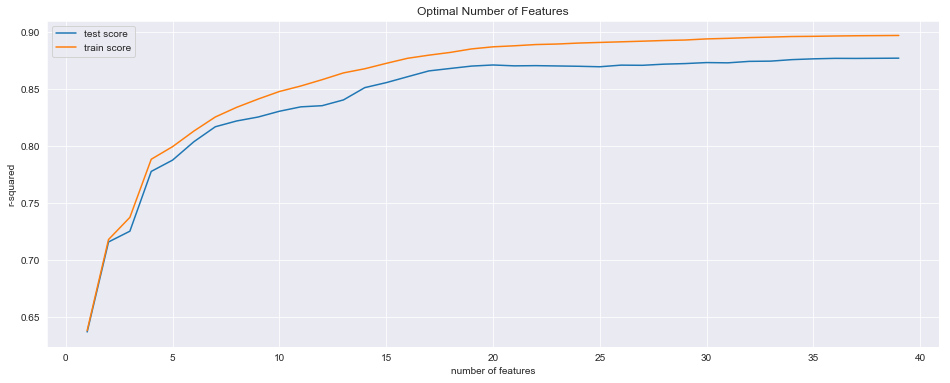

In [999]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [1000]:
#checking the best no of features to select
model_cv.best_params_

{'n_features_to_select': 39}

In [1001]:
# final model with best parameters
n_features_optimal = model_cv.best_params_['n_features_to_select']
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_train, y_train)

In [1002]:
# predict prices of X_train
y_train_pred = rfe.predict(X_train)
print('R2 score of Training Data:',r2_score(y_train,y_train_pred))
print('Mean Squared Error of Training Data :',mean_squared_error(y_train,y_train_pred))

R2 score of Training Data: 0.8950329136858716
Mean Squared Error of Training Data : 0.001818994765564107


In [1003]:
# predict prices of X_test
y_test_pred = rfe.predict(X_test)
print('R2 score of Test Data :',r2_score(y_test,y_test_pred))
print('Mean Squared Error of Test Data :',mean_squared_error(y_test,y_test_pred))

R2 score of Test Data : 0.9004678411295246
Mean Squared Error of Test Data : 0.0015129888159260017


### Ridge Regression

In [1004]:
#using cross validation to tune hyperparameter alpha in ridge regression
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,100.0,1000.0]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 100.0, 1000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [1005]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.003388,0.000490,0.001596,0.000489,0.0001,{'alpha': 0.0001},-0.033955,-0.033691,-0.033108,-0.031439,-0.029510,-0.032341,0.001664,17,-0.028597,-0.029731,-0.028911,-0.029024,-0.029779,-0.029209,0.000468
1,0.004390,0.001353,0.000997,0.000003,0.001,{'alpha': 0.001},-0.033953,-0.033690,-0.033105,-0.031439,-0.029510,-0.032339,0.001663,16,-0.028597,-0.029731,-0.028911,-0.029024,-0.029779,-0.029208,0.000468
2,0.004590,0.001495,0.001394,0.000487,0.01,{'alpha': 0.01},-0.033937,-0.033684,-0.033078,-0.031429,-0.029505,-0.032327,0.001659,15,-0.028592,-0.029728,-0.028907,-0.029021,-0.029777,-0.029205,0.000469
3,0.004787,0.000978,0.001996,0.000632,0.05,{'alpha': 0.05},-0.033871,-0.033661,-0.032972,-0.031388,-0.029485,-0.032276,0.001645,14,-0.028576,-0.029714,-0.028895,-0.029010,-0.029766,-0.029192,0.000470
4,0.003589,0.001016,0.001197,0.000400,0.1,{'alpha': 0.1},-0.033801,-0.033641,-0.032860,-0.031344,-0.029461,-0.032221,0.001632,13,-0.028561,-0.029696,-0.028884,-0.029003,-0.029756,-0.029180,0.000469


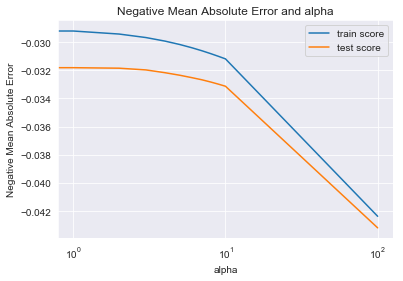

In [1006]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xscale('log')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'])
plt.show()

In [1007]:
#checking the best alpha to select
model_cv.best_params_

{'alpha': 1.0}

In [1008]:
# final model with best parameters
alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
#ridge.coef_

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [1009]:
# predict
y_train_pred = ridge.predict(X_train)
print('R2 score of Training Data:',r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = ridge.predict(X_test)
print('R2 score of Test Data:',r2_score(y_true=y_test, y_pred=y_test_pred))

R2 score of Training Data: 0.8951809242248304
R2 score of Test Data: 0.8985702551891096


In [1010]:
#getting coefficients of model
ridge.coef_

array([-0.01398466, -0.01296409,  0.04296667,  0.06656505, -0.00275584,
       -0.01808733, -0.00188396,  0.00620938, -0.00217778, -0.0144123 ,
       -0.00317859, -0.006003  ,  0.12489598,  0.06211558,  0.03725427,
        0.0044508 ,  0.02406885, -0.0264676 ,  0.01196289,  0.03937591,
        0.0848437 , -0.04966238,  0.00378772,  0.03076548, -0.02882306,
        0.00583338, -0.01578284,  0.00076284,  0.08731392, -0.01281992,
        0.01898513,  0.07262107,  0.01586367, -0.00844114,  0.00664455,
       -0.00217872,  0.2110039 ,  0.1359381 ,  0.00615814,  0.01333663,
        0.00508347, -0.05646296, -0.08193001, -0.04493638,  0.07644035,
        0.04245874,  0.01174569,  0.01601445, -0.01480915, -0.00125535,
        0.01968012,  0.04158054, -0.00997308,  0.00940963,  0.02383188,
        0.0272075 ,  0.02661915, -0.00196348,  0.00658915,  0.02421057,
        0.        ,  0.00043537, -0.00763644, -0.01662988,  0.03505031])

### Lasso Regression

In [1011]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 23 candidates, totalling 115 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    0.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [1012]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005784,0.002130,0.000997,0.000001,0.0001,{'alpha': 0.0001},-0.033622,-0.031958,-0.032061,-0.031154,-0.029360,-0.031631,0.001388,1,-0.028355,-0.029582,-0.028866,-0.028864,-0.029623,-0.029058,0.000482
1,0.004986,0.000631,0.001197,0.000399,0.001,{'alpha': 0.001},-0.036640,-0.031277,-0.034566,-0.033258,-0.032726,-0.033694,0.001812,2,-0.031071,-0.033076,-0.033013,-0.032068,-0.032799,-0.032405,0.000758
2,0.002992,0.000892,0.001197,0.000399,0.01,{'alpha': 0.01},-0.073288,-0.058544,-0.068772,-0.062741,-0.064667,-0.065602,0.005059,3,-0.063949,-0.065134,-0.064898,-0.065669,-0.065320,-0.064994,0.000580
3,0.003125,0.006249,0.000000,0.000000,0.05,{'alpha': 0.05},-0.105127,-0.089135,-0.096275,-0.095180,-0.098920,-0.096927,0.005204,4,-0.094354,-0.099375,-0.096546,-0.097871,-0.096357,-0.096901,0.001671
4,0.006249,0.007653,0.000000,0.000000,0.1,{'alpha': 0.1},-0.105127,-0.089135,-0.096275,-0.095180,-0.098920,-0.096927,0.005204,4,-0.094354,-0.099375,-0.096546,-0.097871,-0.096357,-0.096901,0.001671


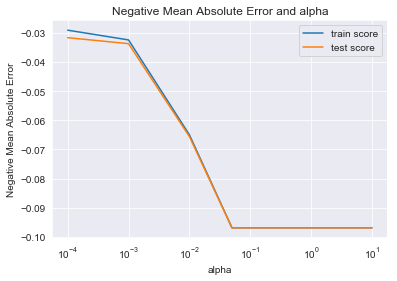

In [1013]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.xscale('log')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'])
plt.show()

In [1014]:
#checking the best alpha to select
model_cv.best_params_

{'alpha': 0.0001}

In [1015]:
#fitting the lasso model on best alpha
alpha = model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [1016]:
# predict
y_train_pred = lasso.predict(X_train)
print('R2 score of Training Data:',r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lasso.predict(X_test)
print('R2 score of Test Data:',r2_score(y_true=y_test, y_pred=y_test_pred))

R2 score of Training Data: 0.8950359540214896
R2 score of Test Data: 0.9022956003449619


In [1017]:
# lasso model parameters
model_parameters = list(lasso.coef_)
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -0.032),
 ('MSSubClass', -0.018),
 ('MSZoning', -0.009),
 ('LotFrontage', 0.028),
 ('LotArea', 0.066),
 ('LotShape', -0.002),
 ('LandContour', -0.015),
 ('LotConfig', -0.001),
 ('LandSlope', 0.0),
 ('Neighborhood', -0.001),
 ('Condition1', -0.007),
 ('BldgType', -0.002),
 ('HouseStyle', -0.001),
 ('OverallQual', 0.134),
 ('OverallCond', 0.061),
 ('YearBuilt', 0.039),
 ('YearRemodAdd', 0.0),
 ('RoofStyle', 0.018),
 ('Exterior1st', -0.017),
 ('Exterior2nd', 0.004),
 ('MasVnrType', 0.04),
 ('MasVnrArea', 0.084),
 ('ExterQual', -0.05),
 ('ExterCond', 0.0),
 ('Foundation', 0.02),
 ('BsmtQual', -0.027),
 ('BsmtCond', 0.006),
 ('BsmtExposure', -0.015),
 ('BsmtFinType1', 0.0),
 ('BsmtFinSF1', 0.071),
 ('BsmtFinType2', -0.006),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.066),
 ('Heating', 0.0),
 ('HeatingQC', -0.009),
 ('CentralAir', 0.002),
 ('Electrical', -0.0),
 ('1stFlrSF', 0.285),
 ('2ndFlrSF', 0.16),
 ('BsmtFullBath', 0.004),
 ('FullBath', 0.0),
 ('HalfBath', 0.0),
 ('BedroomAb

## Model Selection

As we have seen , we performed regression via 3 types of models. Lets compare all of them and selecting the best one.

         Model/Data                 Train R2          Test R2
    
    Simple Linear Regression         0.8950            0.9004
    Ridge Regression                 0.8951            0.8985
    Lasso Regression                 0.8950            0.9022

Important points to Note:
- All 3 models are able to give almost results.
- Difference is train and test error is very less for all the models.
- We will select Ridge Regression model in our case as the difference between training and test data is lowest.

## Questions and Answers

The company wants to know:
1. Which variables are significant in predicting the price of a house, and
2. How well those variables describe the price of a house.
3. Also, determine the optimal value of lambda for ridge and lasso regression.

In [1018]:
#Answer 1
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X_train.columns
cols = cols.insert(0, "constant")
lst = list(zip(cols, model_parameters))

In [1019]:
lst = sorted(lst, key=lambda x: x[1], reverse=True)

Top 10 variables which are most significant in predicting the price of house:

In [1020]:
lst[:10]

[('1stFlrSF', 0.211),
 ('2ndFlrSF', 0.136),
 ('OverallQual', 0.125),
 ('BsmtFinSF1', 0.087),
 ('MasVnrArea', 0.085),
 ('TotRmsAbvGrd', 0.076),
 ('TotalBsmtSF', 0.073),
 ('LotArea', 0.067),
 ('OverallCond', 0.062),
 ('LotFrontage', 0.043)]

Question 2: How well those variables describe the price of a house.<br>
We can make the following points to answer this question:
- `1stFlrSF` and `2stFlrSF` has a greater impact on price. Larger the square feet area of First and Second Floor, more is the house price.
- House price depends very much on the overall quality of house. Higher the Quality and material of the house higher its prices.
- More is the area of Basement more is the place under the house and more is the price.
- Masonry veneer walls are quiet popular in the locality. If area of Masonry veneer walls is high, then company can sold the house at higher price and make more profit.
- `TotRmsAbvGrd`: Total Rooms above grade, obviosly more rooms will attract more prices.
- `OverallCond`: The overall condition is also very important. More better is the condition less will be the expenses in reparing the house. 


Answer 3:
- Optimal value of lambda for ridge regression : `1.0`
- Optimal value of lambda for lasso regression : `0.0001`

**Assignment Complete !! Thank You.**